# Boston Housing : Predicting Continuous Target Variables with Regression Analysis

## Table of content

1. [**Introduction**](#1.-Introduction)<br>
2. [**Collection of Data**](#2.-Collection-of-Data)<br>
    [2.1 Load Data](#2.1-Load-Data)<br>
    [2.2 Data Description](#2.2-Data-Description)<br>
3. [**Data preparation and missing/outlier treatment**](#3.-Data-Preparation-and-Missing/Outlier-Treatment)<br>
    [3.1 Check Null and Missing Values](#3.1-Check-Null-and-Missing-Values)<br>
    [3.2 Outlier Treatment](#3.2-Outlier-Treatment)
4. [**Exploratory Data Analysis**](#4.-Exploratory-Data-Analysis)<br>
    [4.1 Numerical Data Correlation](#4.1-Numerical-Data-Correlation)<br>
5. [**Feature Engineering**](#5.-Feature-Engineering)<br>
    [5.1 Preprocessing](#5.1-Preprocessing)<br>
    [5.2 Validation Data](#5.2-Validation-Data)
6. [**Train Algorithm on Train Data**](#6.-Train-Algorithm-on-Train-Data)<br>
    [6.1 Linear Regression](#6.1-Linear-Regression)<br>
    [6.2 GradientBoostingRegressor](#6.2-GradientBoostingRegressor)<br>
    [6.3 RandomForestRegressor](#6.3-RandomForestRegressor)<br>
    [6.4 Support Vector Regression](#6.4-Support-Vector-Regression)<br>
    [6.5 KNeighborsRegressor](#6.5-KNeighborsRegressor)<br>
    [6.6 XGBRegressor](#6.6-XGBRegressor)<br>
    [6.7 Artificial Neural Network](#6.7-Artificial-Neural-Network)
7. [**Test The Algorithm on Test Data**](#7.-Test-The-Algorithm-on-Test-Data)<br>

## 1. Introduction

AS we know, boston house prices depend on some factors such as percapita crime rate by town,  proportion of non-retail business acres per town, proportion of residential land zoned for lots over, etc.<br>

In this competition, we should analyze some information in boston to predict house prices in that city.<br>

In this case we implement regression for a boston house price prediction depending on boston housing dataset information.<br>

$\textbf{Arif Romadhan}$ <br>
email : arifromadhan19@gmail.com<br><br>
[Link my kaggle](https://www.kaggle.com/c/boston-housing)<br>

In [20]:
from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import xgboost
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold


import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor





## 2. Collection of Data

###  2.1 Load Data

In [2]:
#Load Dataset
train = pd.read_csv("dataset/train.csv")
train.columns = ['ID','CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
train = train.drop('ID',axis=1)
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


### 2.2 Data Description

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 14 columns):
CRIM       333 non-null float64
ZN         333 non-null float64
INDUS      333 non-null float64
CHAS       333 non-null int64
NOX        333 non-null float64
RM         333 non-null float64
AGE        333 non-null float64
DIS        333 non-null float64
RAD        333 non-null int64
TAX        333 non-null int64
PTRATIO    333 non-null float64
B          333 non-null float64
LSTAT      333 non-null float64
MEDV       333 non-null float64
dtypes: float64(11), int64(3)
memory usage: 36.5 KB


Source: https://www.kaggle.com/c/boston-housing

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
</pre>

## 3. Data Preparation and Missing/Outlier Treatment

### 3.1 Check Null and Missing Values

In [4]:
# Fill empty and NaNs values with NaN
train = train.fillna(np.nan)

# Check for Null values
train_null = train.isnull().sum(axis = 0)
train_null

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 3.2 Outlier Treatment

In [5]:
cols = list(train)
# sns.pairplot(train[cols], size=2.5)
# plt.tight_layout()
# plt.show()

### Feature Distribution

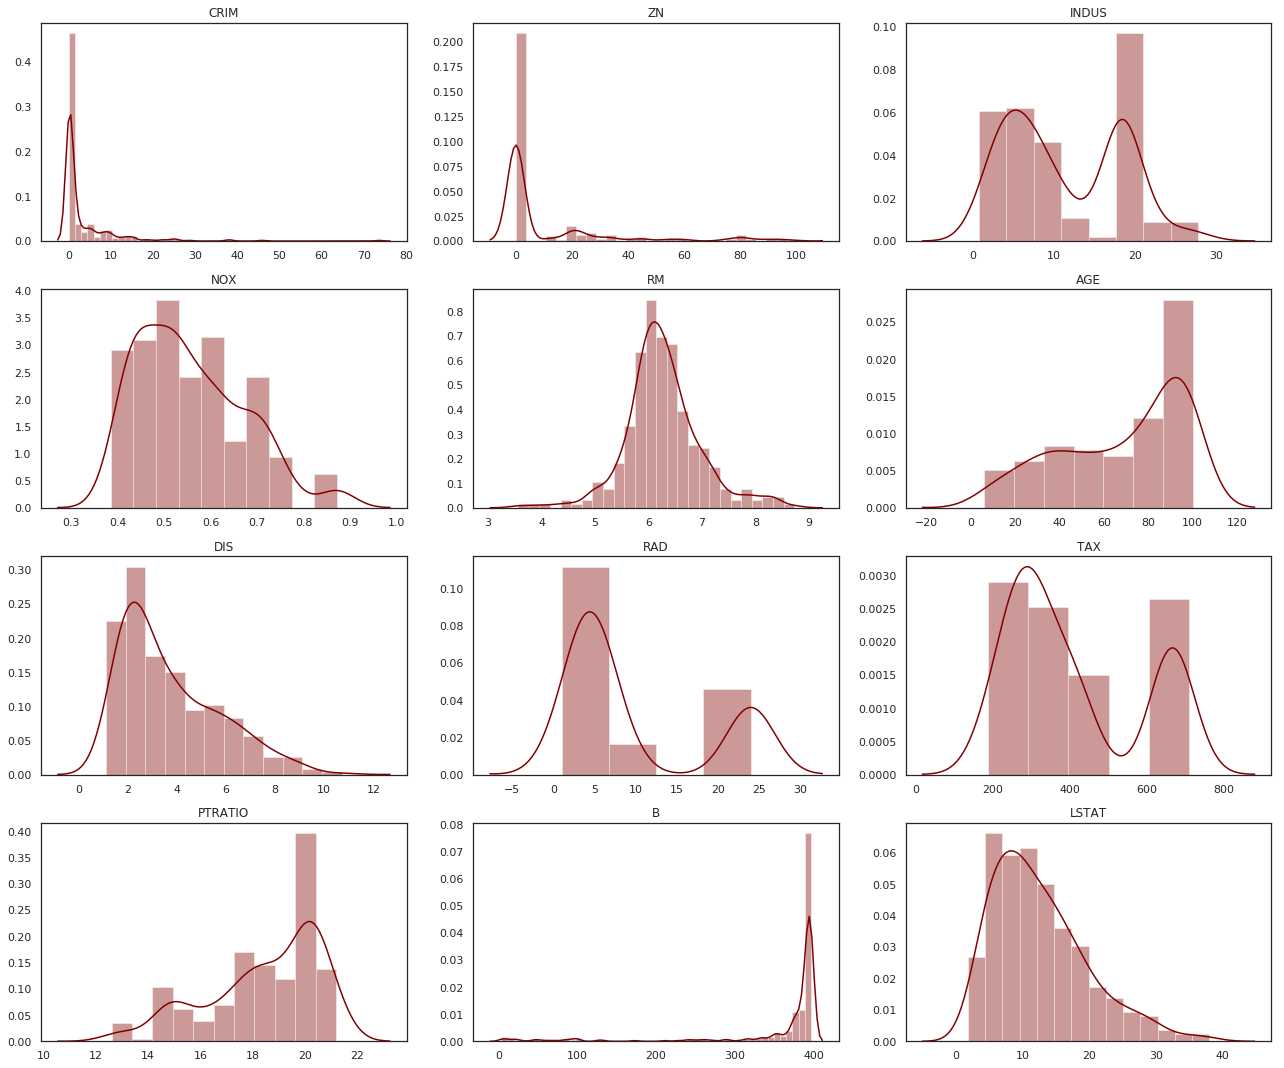

In [6]:
f,ax = plt.subplots(4,3,figsize=(18,15))

g = sns.distplot(train['CRIM'],kde=True,color='#800000', ax=ax[0,0])
ax[0,0].set_title('CRIM')
ax[0,0].set_xlabel('')
g = sns.distplot(train['ZN'],kde=True,color='#800000', ax=ax[0,1])
ax[0,1].set_title('ZN')
ax[0,1].set_xlabel('')
g = sns.distplot(train['INDUS'],kde=True,color='#800000', ax=ax[0,2])
ax[0,2].set_title('INDUS')
ax[0,2].set_xlabel('')
g = sns.distplot(train['NOX'],kde=True,color='#800000', ax=ax[1,0])
ax[1,0].set_title('NOX')
ax[1,0].set_xlabel('')
g = sns.distplot(train['RM'],kde=True,color='#800000', ax=ax[1,1])
ax[1,1].set_title('RM')
ax[1,1].set_xlabel('')
g = sns.distplot(train['AGE'],kde=True,color='#800000', ax=ax[1,2])
ax[1,2].set_title('AGE')
ax[1,2].set_xlabel('')
g = sns.distplot(train['DIS'],kde=True,color='#800000', ax=ax[2,0])
ax[2,0].set_title('DIS')
ax[2,0].set_xlabel('')
g = sns.distplot(train['RAD'],kde=True,color='#800000', ax=ax[2,1])
ax[2,1].set_title('RAD')
ax[2,1].set_xlabel('')
g = sns.distplot(train['TAX'],kde=True,color='#800000', ax=ax[2,2])
ax[2,2].set_title('TAX')
ax[2,2].set_xlabel('')
g = sns.distplot(train['PTRATIO'],kde=True,color='#800000', ax=ax[3,0])
ax[3,0].set_title('PTRATIO')
ax[3,0].set_xlabel('')
g = sns.distplot(train['B'],kde=True,color='#800000', ax=ax[3,1])
ax[3,1].set_title('B')
ax[3,1].set_xlabel('')
g = sns.distplot(train['LSTAT'],kde=True,color='#800000', ax=ax[3,2])
ax[3,2].set_title('LSTAT')
ax[3,2].set_xlabel('')
plt.tight_layout()

If we analyze every distribution, we found skewed distribution such as CRIM, ZN, NOX, DIS, and B. In order to change skewed to normal distribution, we going to use np.log to change value skewed distribution.

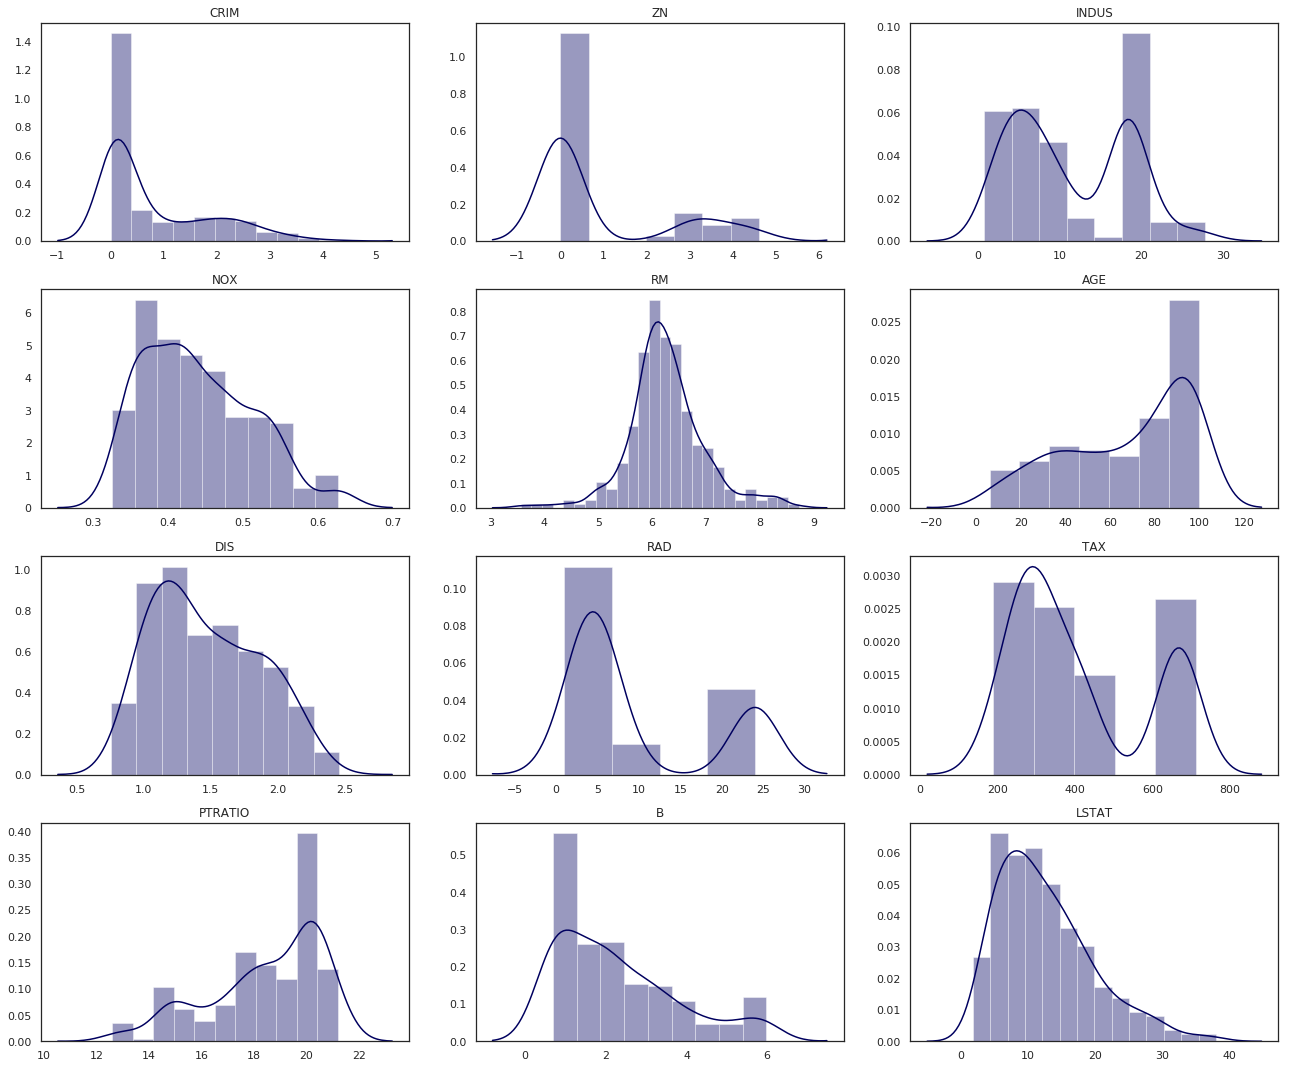

In [7]:
f,ax = plt.subplots(4,3,figsize=(18,15))

g = sns.distplot(np.log(train['CRIM']+1),kde=True,color='#00005f', ax=ax[0,0])
ax[0,0].set_title('CRIM')
ax[0,0].set_xlabel('')
g = sns.distplot(np.log(train['ZN'] + 1),kde=True,color='#00005f', ax=ax[0,1])
ax[0,1].set_title('ZN')
ax[0,1].set_xlabel('')
g = sns.distplot(train['INDUS'],kde=True,color='#00005f', ax=ax[0,2])
ax[0,2].set_title('INDUS')
ax[0,2].set_xlabel('')
g = sns.distplot(np.log(train['NOX']+1),kde=True,color='#00005f', ax=ax[1,0])
ax[1,0].set_title('NOX')
ax[1,0].set_xlabel('')
g = sns.distplot(train['RM'],kde=True,color='#00005f', ax=ax[1,1])
ax[1,1].set_title('RM')
ax[1,1].set_xlabel('')
g = sns.distplot((train['AGE']),kde=True,color='#00005f', ax=ax[1,2])
ax[1,2].set_title('AGE')
ax[1,2].set_xlabel('')
g = sns.distplot(np.log(train['DIS']+1),kde=True,color='#00005f', ax=ax[2,0])
ax[2,0].set_title('DIS')
ax[2,0].set_xlabel('')
g = sns.distplot(train['RAD'],kde=True,color='#00005f', ax=ax[2,1])
ax[2,1].set_title('RAD')
ax[2,1].set_xlabel('')
g = sns.distplot(train['TAX'],kde=True,color='#00005f', ax=ax[2,2])
ax[2,2].set_title('TAX')
ax[2,2].set_xlabel('')
g = sns.distplot((train['PTRATIO']),kde=True,color='#00005f', ax=ax[3,0])
ax[3,0].set_title('PTRATIO')
ax[3,0].set_xlabel('')
g = sns.distplot(np.log((train['B'].max() + 2) - train['B']),kde=True,color='#00005f', ax=ax[3,1])
ax[3,1].set_title('B')
ax[3,1].set_xlabel('')
g = sns.distplot(train['LSTAT'],kde=True,color='#00005f', ax=ax[3,2])
ax[3,2].set_title('LSTAT')
ax[3,2].set_xlabel('')
plt.tight_layout()

**The used of np.log can change the skewed distribution to normal distribution and remove outlier data.**

In [8]:
train['CRIM'] = np.log(train['CRIM']+1)
train['ZN'] = np.log(train['ZN']+1)
train['NOX'] = np.log(train['NOX']+1)
train['DIS'] = np.log(train['DIS']+1)
train['B'] = np.log((train['B'].max() + 2) - train['B'])

## 4. Exploratory Data Analysis

### 4.1 Numerical Data Correlation

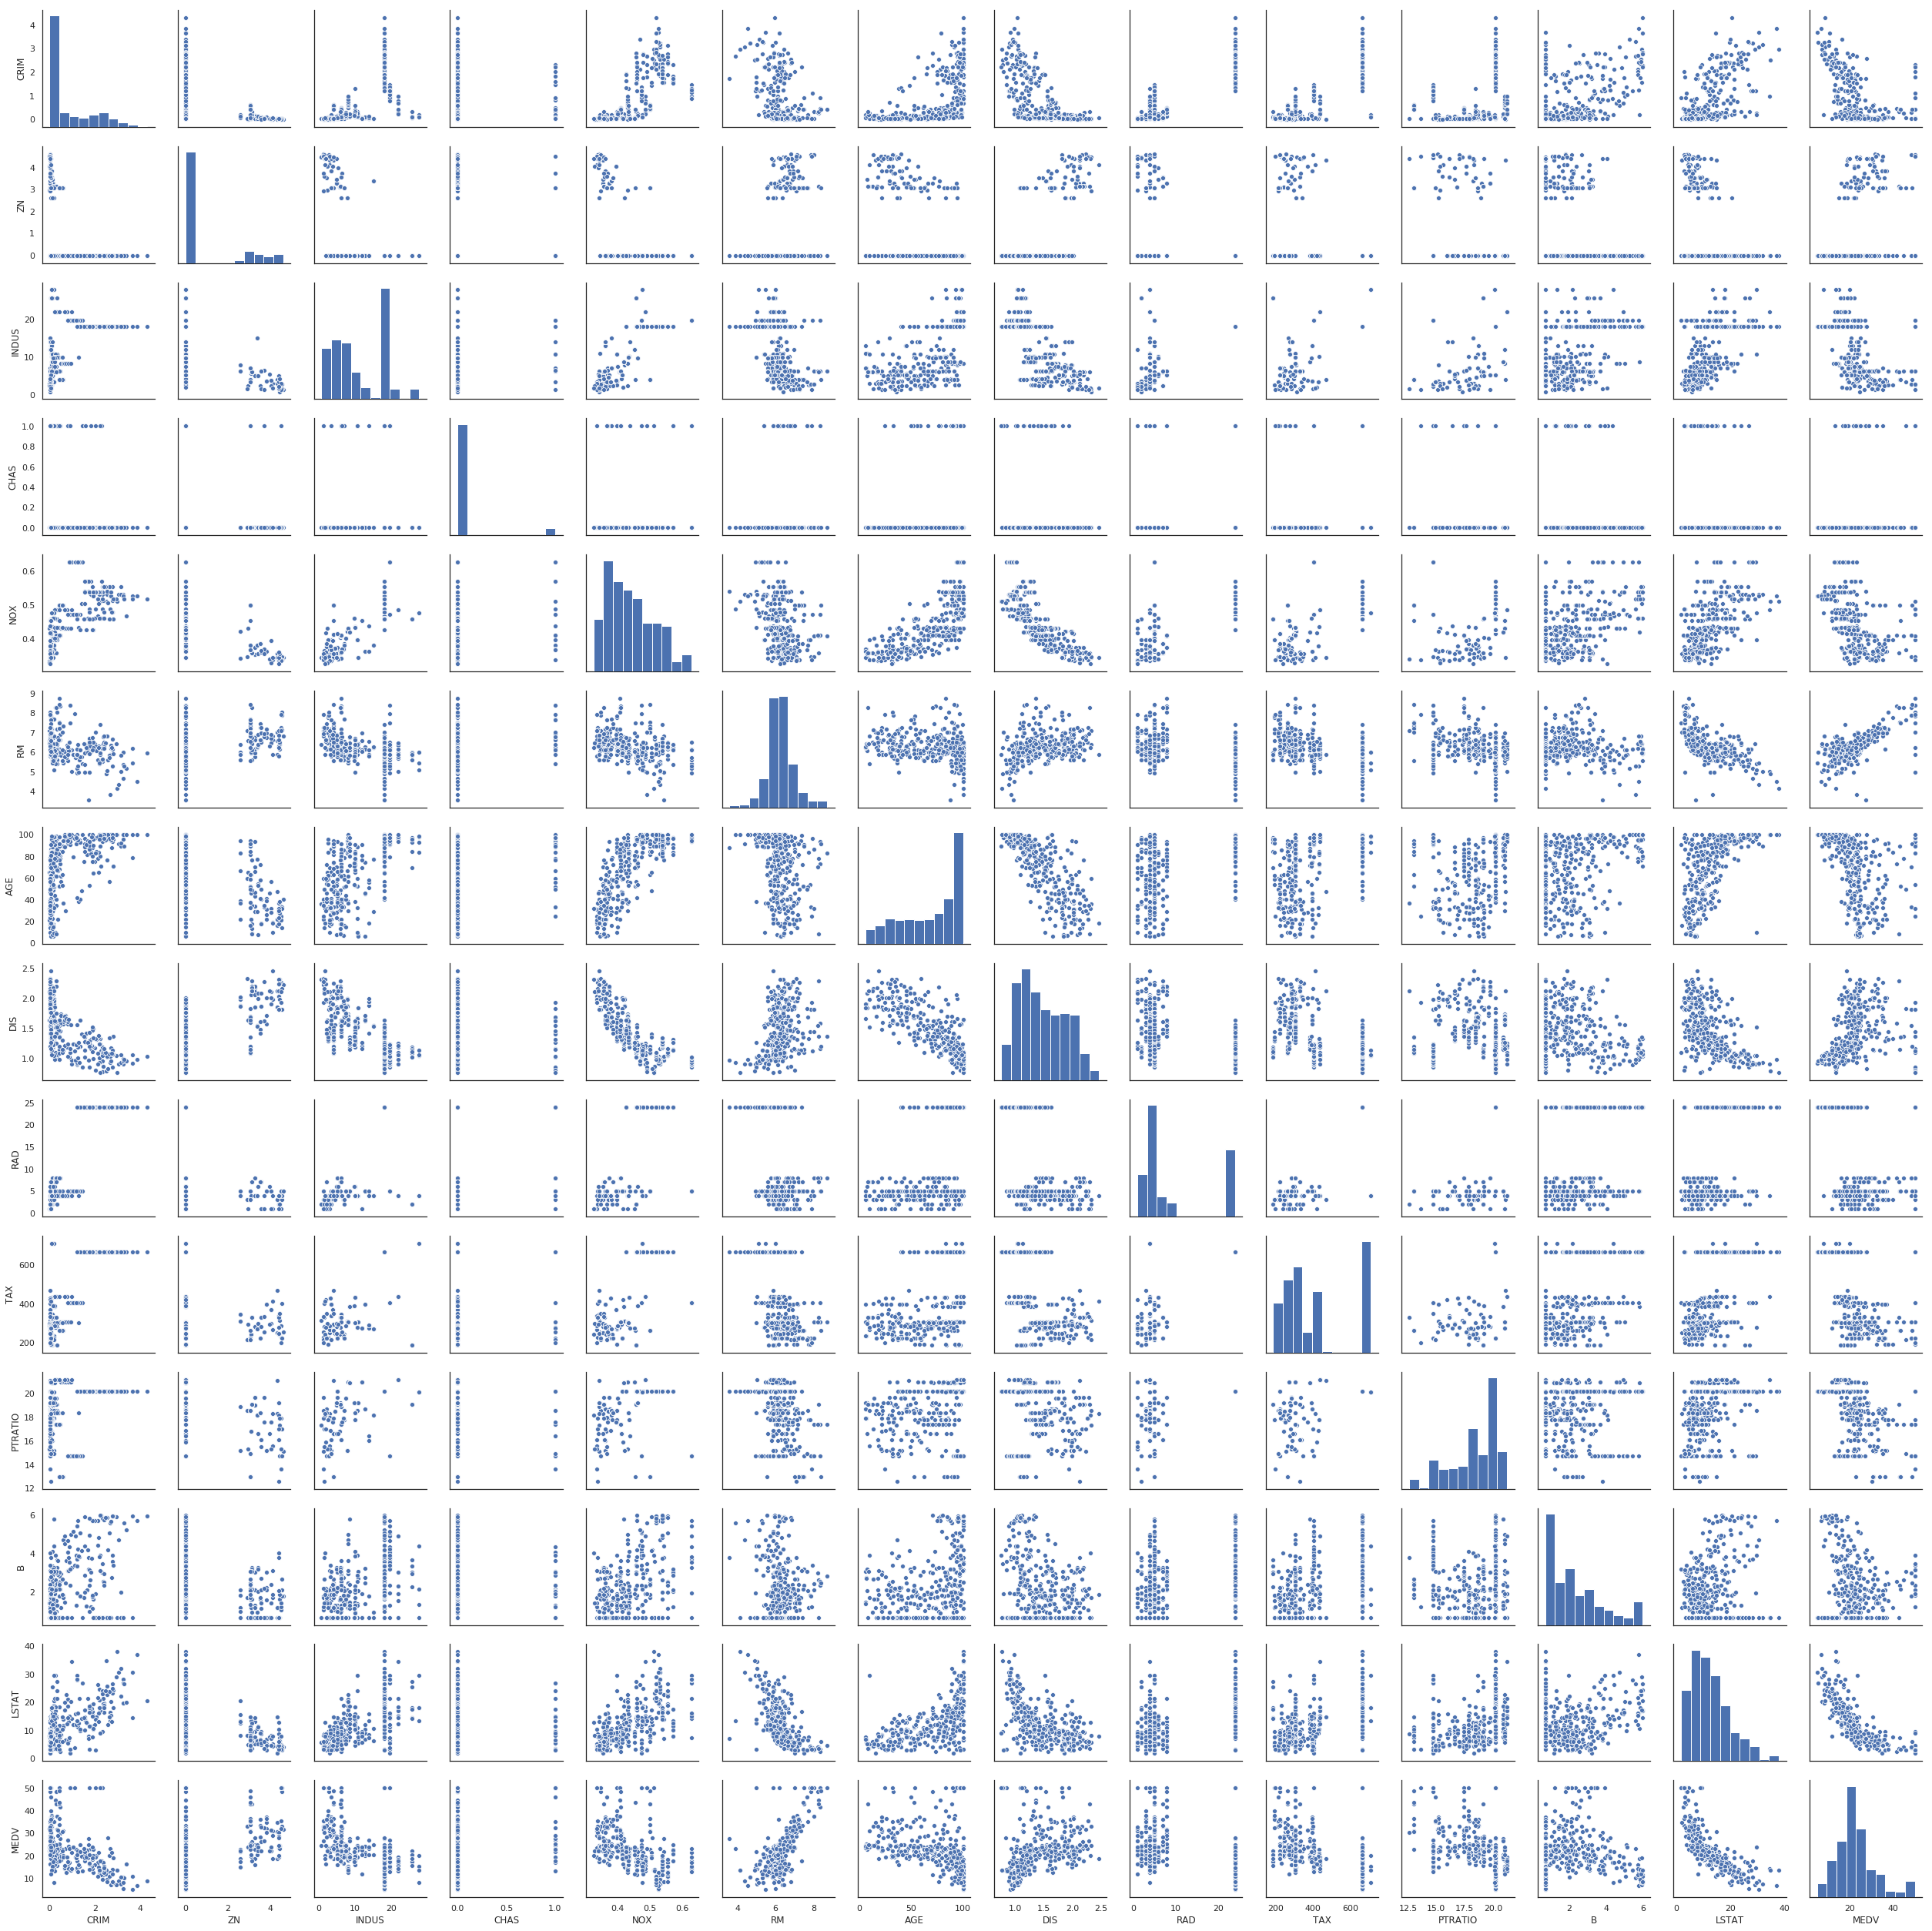

In [9]:
cols = list(train)
sns.pairplot(train[cols], size=2.5)
# sns.pairplot(train, hue='MEDV')
plt.show()

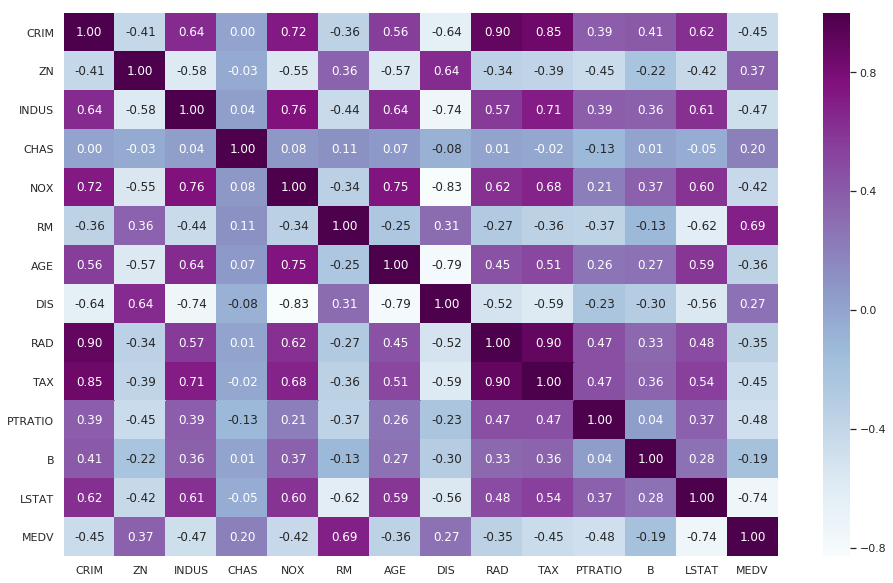

In [10]:
corr_ =train[cols].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

## 5. Feature Engineering

### 5.1 Preprocessing

**Standardize features using sklearn.preprocessing.StandardScaler**

In [15]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1:]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006300,2.944439,2.31,0,0.430483,6.575,65.2,1.627278,1,296,15.3,0.693147,4.98
1,0.026944,0.000000,7.07,0,0.384582,6.421,78.9,1.786261,2,242,17.8,0.693147,9.14
2,0.031857,0.000000,2.18,0,0.377066,6.998,45.8,1.954757,3,222,18.7,1.451614,2.94
3,0.066770,0.000000,2.18,0,0.377066,7.147,54.2,1.954757,3,222,18.7,0.693147,5.33
4,0.084608,2.602690,7.87,0,0.421338,6.012,66.6,1.881067,5,311,15.2,1.193922,12.43


In [12]:
Y.head()

,MEDV
0,24.0
1,21.6
2,33.4
3,36.2
4,22.9


In [16]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X.astype(float))
y_std = sc_y.fit_transform(y.astype(float))

### 5.2 Validation Data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, y_std, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(223, 13)
(110, 13)
(223, 1)
(110, 1)


## 6. Train Algorithm on Train Data

### 6.1 Linear Regression

MSE :  0.305106830362
Estimated intercept coefficient : [ 0.02282336]
Number of coefficients : 1


Text(0.5,1,'MEDV vs Predicted MEDV (Linear Regression) ')

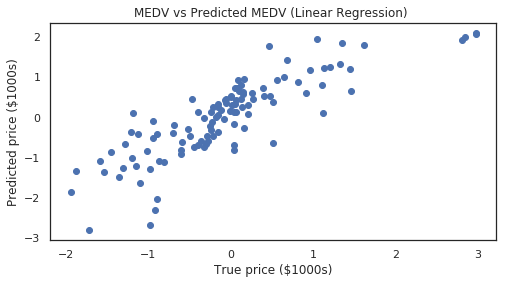

In [18]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)

print('MSE : ',mse)
print ('Estimated intercept coefficient :', lm.intercept_)
print ('Number of coefficients :', len(lm.coef_))

fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(Y_test, Y_pred)
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.xticks(rotation=0)
plt.title("MEDV vs Predicted MEDV (Linear Regression) ")

In [21]:
scores_mse = cross_validation.cross_val_score(lm, X_train, Y_train, scoring='mean_squared_error', cv=10)
print('Scores MSE  ',scores_mse)
print('')
print ('Mean Scores MSE : ',scores_mse.mean())

print ('Single subset performance: ' , lm.score(X_test, Y_test)) 
print('')
scores = cross_val_score(lm, X_std,y_std, cv=10)
print ('Accuracies of 10 folds: ' , scores)
print('')
print ('Mean accuracy of 10 folds: ' , scores.mean())

Scores MSE   [-0.13106411 -0.11424624 -0.25667967 -0.46562056 -0.46385299 -0.64160472
 -0.14463885 -0.22293855 -0.44994602 -0.23638907]

Mean Scores MSE :  -0.31269807825
Single subset performance:  0.660317830059

Accuracies of 10 folds:  [ 0.60989285  0.06333012 -1.86234647  0.63548889  0.59730606  0.70761003
  0.70747364 -0.23090205 -5.6904994   0.06976176]

Mean accuracy of 10 folds:  -0.439288457203


### 6.2 GradientBoostingRegressor

MSE :  0.195036675642


Text(0.5,1,'MEDV vs Predicted MEDV (GradientBoostingRegressor)')

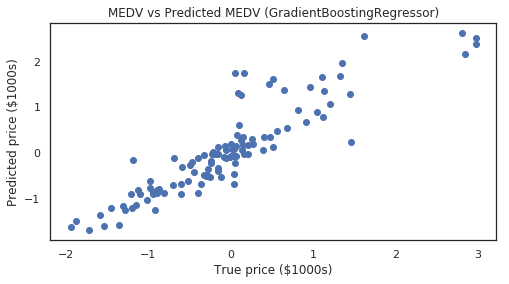

In [22]:
clf_gb = GradientBoostingRegressor()
clf_gb.fit(X_train, Y_train)

Y_pred_gb = clf_gb.predict(X_test)
mse_gb = mean_squared_error(Y_test, Y_pred_gb)

print('MSE : ',mse_gb)

fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(Y_test, Y_pred_gb)
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.xticks(rotation=0)
plt.title("MEDV vs Predicted MEDV (GradientBoostingRegressor)")

### 6.3 RandomForestRegressor

MSE :  0.233335413323


Text(0.5,1,'MEDV vs Predicted MEDV (RandomForestRegressor)')

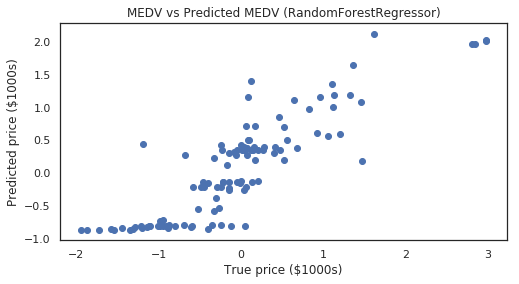

In [23]:
clf_rf = RandomForestRegressor(n_estimators=500, random_state=0,max_depth=2)
clf_rf.fit(X_train, Y_train)

Y_pred_rf = clf_rf.predict(X_test)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)

print('MSE : ',mse_rf)

fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(Y_test, Y_pred_rf)
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.xticks(rotation=0)
plt.title("MEDV vs Predicted MEDV (RandomForestRegressor)")

### 6.4 Support Vector Regression

MSE :  0.113819399386


Text(0.5,1,'MEDV vs Predicted MEDV (Support Vector Regression)')

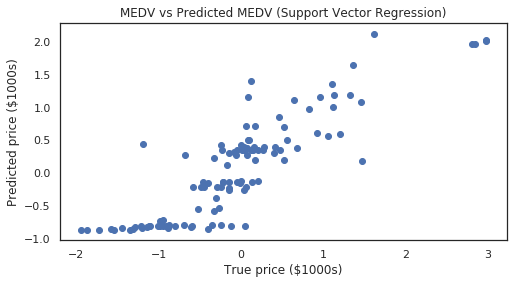

In [25]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, Y_train)

Y_pred_svr = svr_rbf.predict(X_test)
mse_svr = mean_squared_error(Y_test, Y_pred_svr)

print('MSE : ',mse_svr)

fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(Y_test, Y_pred_rf)
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.xticks(rotation=0)
plt.title("MEDV vs Predicted MEDV (Support Vector Regression)")

### 6.5 KNeighborsRegressor

MSE :  0.258912996267


Text(0.5,1,'MEDV vs Predicted MEDV (KNeighborsRegressor)')

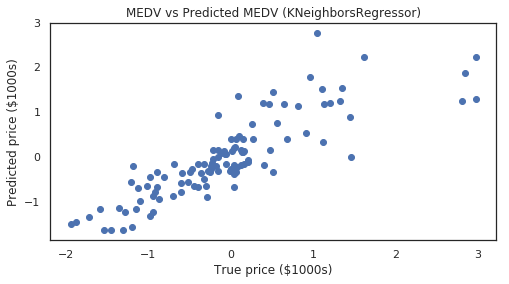

In [26]:
clf_knr = KNeighborsRegressor(n_neighbors=2)
clf_knr.fit(X_train, Y_train)

Y_pred_knr = clf_knr.predict(X_test)
mse_knr = mean_squared_error(Y_test, Y_pred_knr)

print('MSE : ',mse_knr)

fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(Y_test, Y_pred_knr)
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.xticks(rotation=0)
plt.title("MEDV vs Predicted MEDV (KNeighborsRegressor)")

### 6.6 XGBRegressor

MSE :  0.203004283933


Text(0.5,1,'MEDV vs Predicted MEDV (XGBRegressor)')

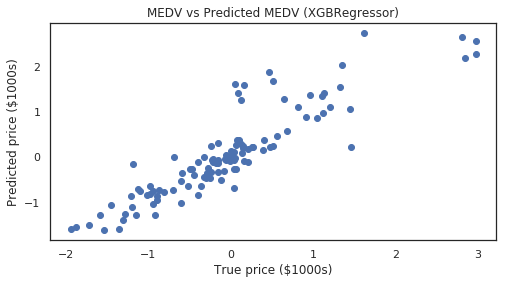

In [27]:
clf_xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)

clf_xgb.fit(X_train, Y_train)

Y_pred_xgb = clf_xgb.predict(X_test)
mse_xgb = mean_squared_error(Y_test, Y_pred_xgb)

print('MSE : ',mse_xgb)

fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(Y_test, Y_pred_xgb)
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.xticks(rotation=0)
plt.title("MEDV vs Predicted MEDV (XGBRegressor)")

### 6.7 Artificial Neural Network

In [28]:
model = Sequential()
model.add(Dense(64, input_dim=13, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(32, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(16, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, batch_size = 30, epochs = 100)

Epoch 1/100
223/223 [==============================] - 0s - loss: 1.0482     
Epoch 2/100
223/223 [==============================] - 0s - loss: 1.0444     
Epoch 3/100
223/223 [==============================] - 0s - loss: 1.0337     
Epoch 4/100
223/223 [==============================] - 0s - loss: 1.0085     
Epoch 5/100
223/223 [==============================] - 0s - loss: 0.9574     
Epoch 6/100
223/223 [==============================] - 0s - loss: 0.8611     
Epoch 7/100
223/223 [==============================] - 0s - loss: 0.7292     
Epoch 8/100
223/223 [==============================] - 0s - loss: 0.6076     
Epoch 9/100
223/223 [==============================] - 0s - loss: 0.5122     
Epoch 10/100
223/223 [==============================] - 0s - loss: 0.4267     
Epoch 11/100
223/223 [==============================] - 0s - loss: 0.3445     
Epoch 12/100
223/223 [==============================] - 0s - loss: 0.2916     
Epoch 13/100
223/223 [==============================] - 0s - 

MSE :  0.176593909924


Text(0.5,1,'MEDV vs Predicted MEDV (ANN)')

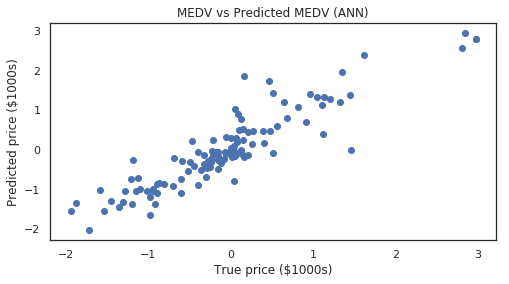

In [29]:
Y_pred_nn = model.predict(X_test)
mse_nn = mean_squared_error(Y_test, Y_pred_nn)
print('MSE : ',mse_nn)

fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(Y_test, Y_pred_nn)
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.xticks(rotation=0)
plt.title("MEDV vs Predicted MEDV (ANN)")

In [30]:
regression_update = pd.DataFrame({
    'Model': ['Linear Regression', 'GradientBoostingRegressor', 'RandomForestRegressor',
              'Support Vector Regression','KNeighborsRegressor', ' XGBRegressor', 'ANN'],
    'MSE': [mse, mse_gb, mse_rf, mse_svr, mse_knr, 
              mse_xgb, mse_nn]})
regression_update['MSE'] = np.round(regression_update['MSE'], decimals = 4)
regression_update = regression_update.sort_values('MSE', ascending=True)
regression_update

,MSE,Model
3,0.1138,Support Vector Regression
6,0.1766,ANN
1,0.1950,GradientBoostingRegressor
5,0.2030,XGBRegressor
2,0.2333,RandomForestRegressor
4,0.2589,KNeighborsRegressor
0,0.3051,Linear Regression


In [31]:
trace = go.Bar(
    x=regression_update['Model'],
    y=regression_update['MSE'],
    marker=dict(
        color=regression_update['MSE'],
        showscale=True
    ),
)
layout = go.Layout(title="MSE ")
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="MSE")

### 7. Test The Algorithm on Test Data

In [32]:
#Load Dataset
test = pd.read_csv("dataset/test.csv")
test.columns = ['ID','CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT']
id_ = test['ID']
test = test.drop('ID',axis=1)
test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


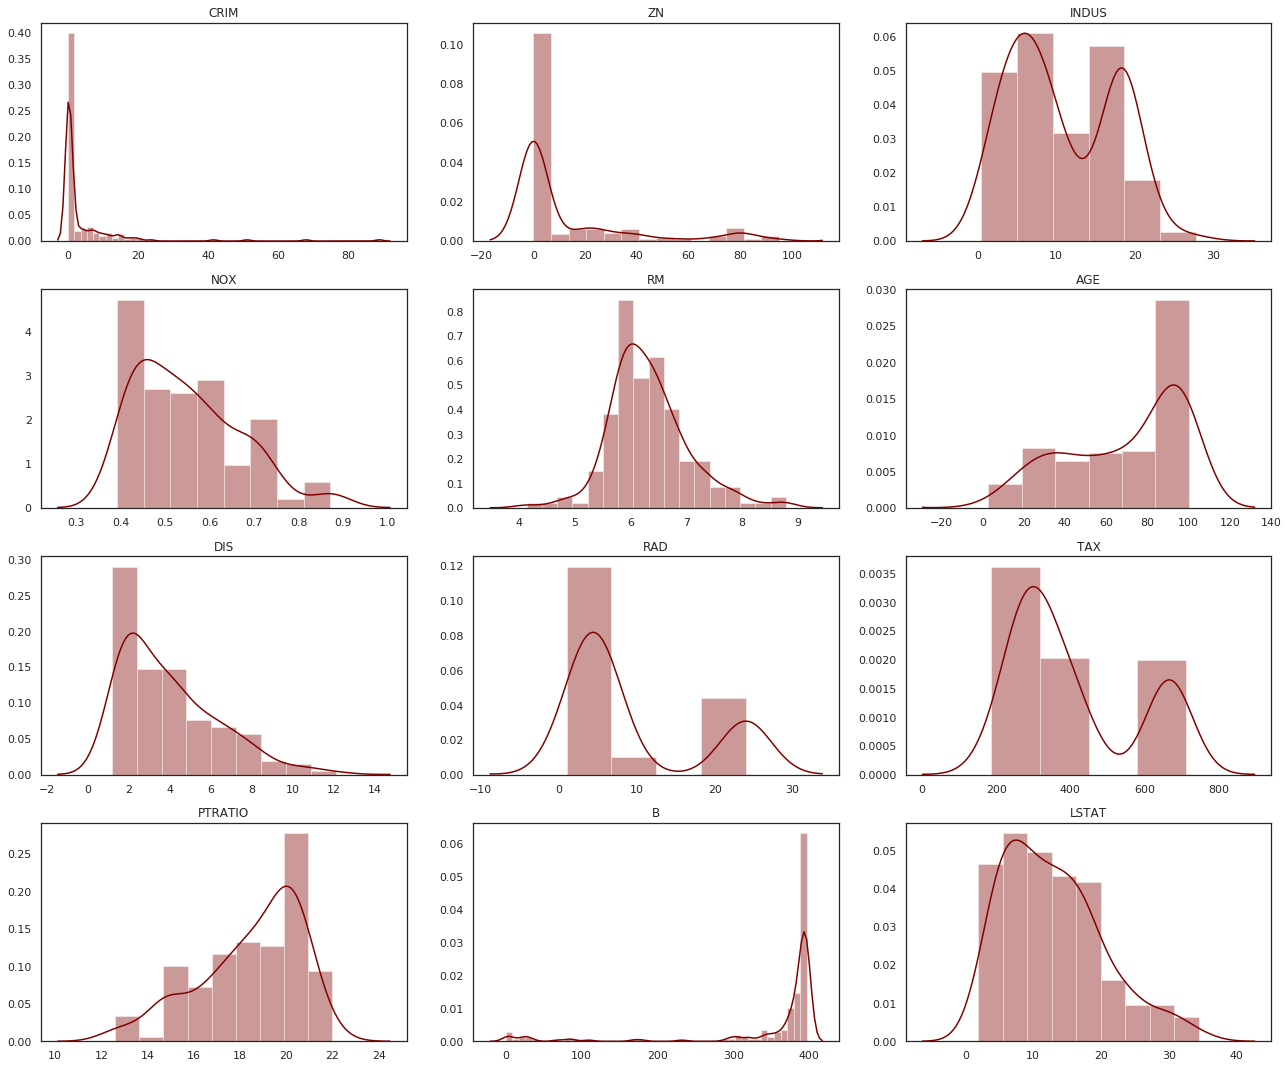

In [33]:
f,ax = plt.subplots(4,3,figsize=(18,15))

g = sns.distplot(test['CRIM'],kde=True,color='#800000', ax=ax[0,0])
ax[0,0].set_title('CRIM')
ax[0,0].set_xlabel('')
g = sns.distplot(test['ZN'],kde=True,color='#800000', ax=ax[0,1])
ax[0,1].set_title('ZN')
ax[0,1].set_xlabel('')
g = sns.distplot(test['INDUS'],kde=True,color='#800000', ax=ax[0,2])
ax[0,2].set_title('INDUS')
ax[0,2].set_xlabel('')
g = sns.distplot(test['NOX'],kde=True,color='#800000', ax=ax[1,0])
ax[1,0].set_title('NOX')
ax[1,0].set_xlabel('')
g = sns.distplot(test['RM'],kde=True,color='#800000', ax=ax[1,1])
ax[1,1].set_title('RM')
ax[1,1].set_xlabel('')
g = sns.distplot(test['AGE'],kde=True,color='#800000', ax=ax[1,2])
ax[1,2].set_title('AGE')
ax[1,2].set_xlabel('')
g = sns.distplot(test['DIS'],kde=True,color='#800000', ax=ax[2,0])
ax[2,0].set_title('DIS')
ax[2,0].set_xlabel('')
g = sns.distplot(test['RAD'],kde=True,color='#800000', ax=ax[2,1])
ax[2,1].set_title('RAD')
ax[2,1].set_xlabel('')
g = sns.distplot(test['TAX'],kde=True,color='#800000', ax=ax[2,2])
ax[2,2].set_title('TAX')
ax[2,2].set_xlabel('')
g = sns.distplot(test['PTRATIO'],kde=True,color='#800000', ax=ax[3,0])
ax[3,0].set_title('PTRATIO')
ax[3,0].set_xlabel('')
g = sns.distplot(test['B'],kde=True,color='#800000', ax=ax[3,1])
ax[3,1].set_title('B')
ax[3,1].set_xlabel('')
g = sns.distplot(test['LSTAT'],kde=True,color='#800000', ax=ax[3,2])
ax[3,2].set_title('LSTAT')
ax[3,2].set_xlabel('')
plt.tight_layout()

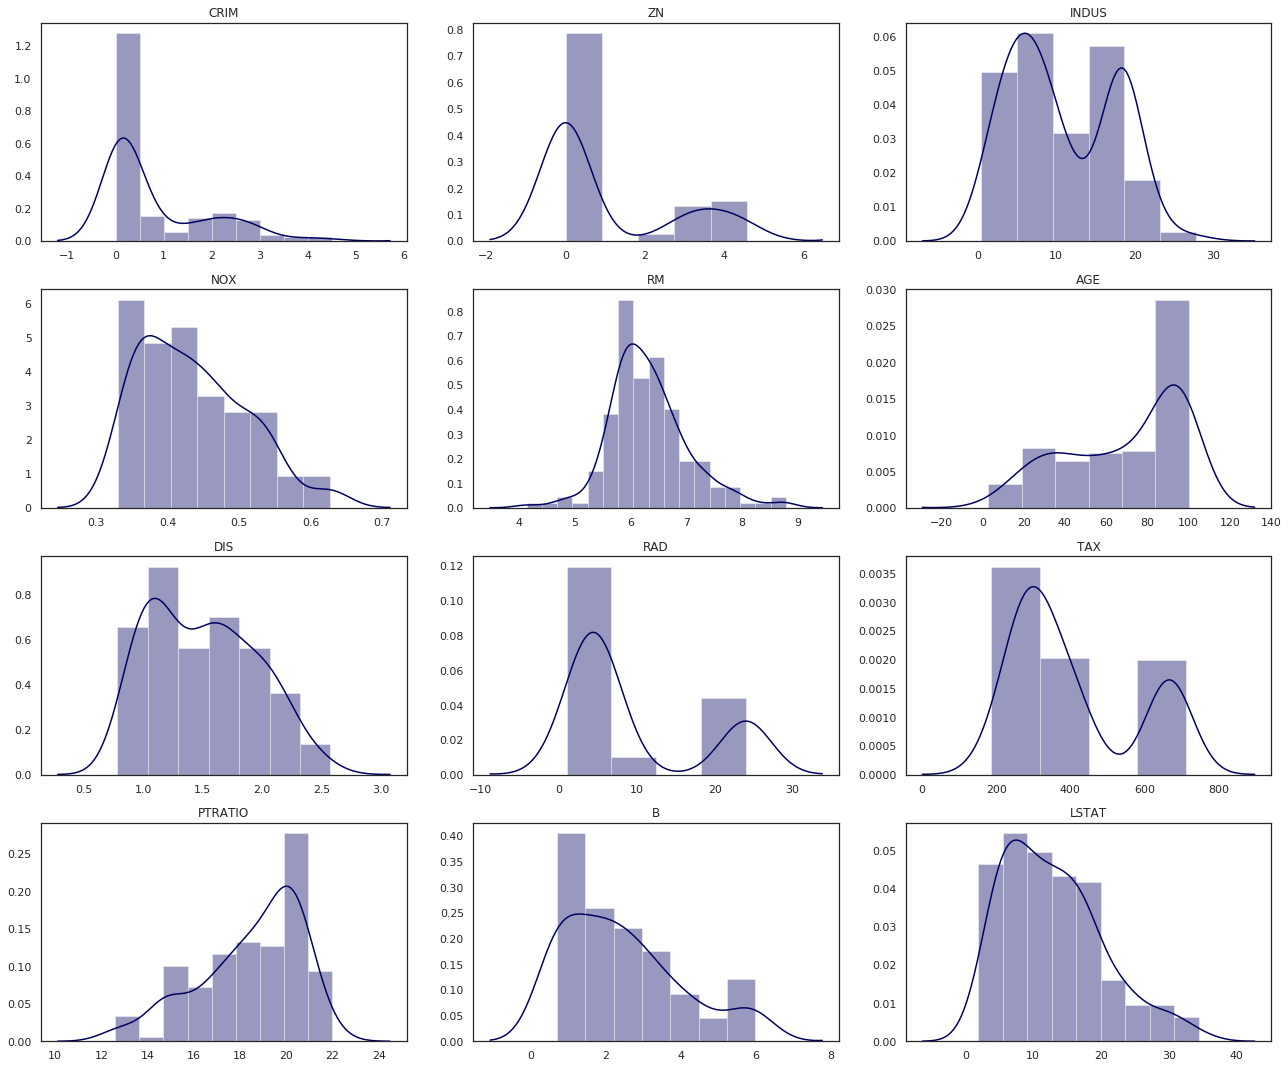

In [34]:
f,ax = plt.subplots(4,3,figsize=(18,15))

g = sns.distplot(np.log(test['CRIM']+1),kde=True,color='#00005f', ax=ax[0,0])
ax[0,0].set_title('CRIM')
ax[0,0].set_xlabel('')
g = sns.distplot(np.log(test['ZN'] + 1),kde=True,color='#00005f', ax=ax[0,1])
ax[0,1].set_title('ZN')
ax[0,1].set_xlabel('')
g = sns.distplot(test['INDUS'],kde=True,color='#00005f', ax=ax[0,2])
ax[0,2].set_title('INDUS')
ax[0,2].set_xlabel('')
g = sns.distplot(np.log(test['NOX']+1),kde=True,color='#00005f', ax=ax[1,0])
ax[1,0].set_title('NOX')
ax[1,0].set_xlabel('')
g = sns.distplot(test['RM'],kde=True,color='#00005f', ax=ax[1,1])
ax[1,1].set_title('RM')
ax[1,1].set_xlabel('')
g = sns.distplot((test['AGE']),kde=True,color='#00005f', ax=ax[1,2])
ax[1,2].set_title('AGE')
ax[1,2].set_xlabel('')
g = sns.distplot(np.log(test['DIS']+1),kde=True,color='#00005f', ax=ax[2,0])
ax[2,0].set_title('DIS')
ax[2,0].set_xlabel('')
g = sns.distplot(test['RAD'],kde=True,color='#00005f', ax=ax[2,1])
ax[2,1].set_title('RAD')
ax[2,1].set_xlabel('')
g = sns.distplot(test['TAX'],kde=True,color='#00005f', ax=ax[2,2])
ax[2,2].set_title('TAX')
ax[2,2].set_xlabel('')
g = sns.distplot((test['PTRATIO']),kde=True,color='#00005f', ax=ax[3,0])
ax[3,0].set_title('PTRATIO')
ax[3,0].set_xlabel('')
g = sns.distplot(np.log((test['B'].max() + 2) - test['B']),kde=True,color='#00005f', ax=ax[3,1])
ax[3,1].set_title('B')
ax[3,1].set_xlabel('')
g = sns.distplot(test['LSTAT'],kde=True,color='#00005f', ax=ax[3,2])
ax[3,2].set_title('LSTAT')
ax[3,2].set_xlabel('')
plt.tight_layout()

In [35]:
test['CRIM'] = np.log(test['CRIM']+1)
test['ZN'] = np.log(test['ZN']+1)
test['NOX'] = np.log(test['NOX']+1)
test['DIS'] = np.log(test['DIS']+1)
test['B'] = np.log((test['B'].max() + 2) - test['B'])

In [36]:
test_std = sc_x.transform(test.astype(float))

In [37]:
Y_pred_ = model.predict(test_std)

In [38]:
Y_pred_test = sc_y.inverse_transform(Y_pred_,copy=None)
Y_pred_test[0:5]

array([[ 35.69001007],
       [ 25.45137787],
       [ 17.60197639],
       [ 13.77220917],
       [ 17.89354706]], dtype=float32)

In [39]:
temp_arr = []
for i in Y_pred_test:
    temp = i[0]
    temp_arr.append(temp)
df = pd.DataFrame({'medv': temp_arr})
df['id'] = id_
new_order = [1,0]
df = df[df.columns[new_order]]
df.head()

,id,medv
0,3,35.690010
1,6,25.451378
2,8,17.601976
3,9,13.772209
4,10,17.893547


In [40]:
# df.to_csv('submission.csv', index = False)